In [1]:
from cil.framework import ImageGeometry
from cil.utilities.jupyter import islicer
from cil.utilities.display import show2D, show1D, show_geometry
from cil.processors import CentreOfRotationCorrector, TransmissionAbsorptionConverter, RingRemover, Padder, Slicer
from cil.recon import FBP
from cil.io import NEXUSDataWriter
from cil.io.utilities import HDF5_utilities
import numpy as np
import os
import hdf5plugin
from cil.framework import AcquisitionGeometry, AcquisitionData
import matplotlib.pyplot as plt
from tomopy.prep.phase import retrieve_phase
from cil.io import NEXUSDataWriter, NEXUSDataReader

/home/bgb37495/miniconda3/envs/cil_esrf/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


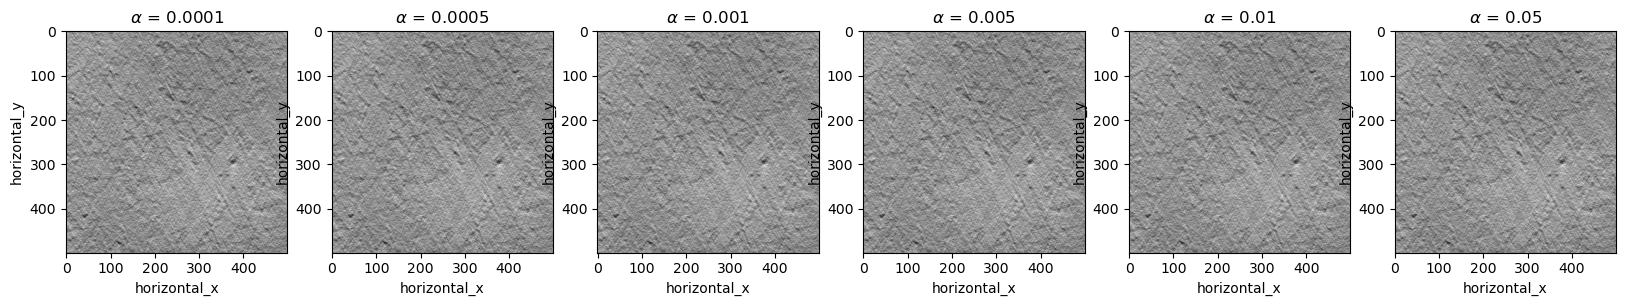

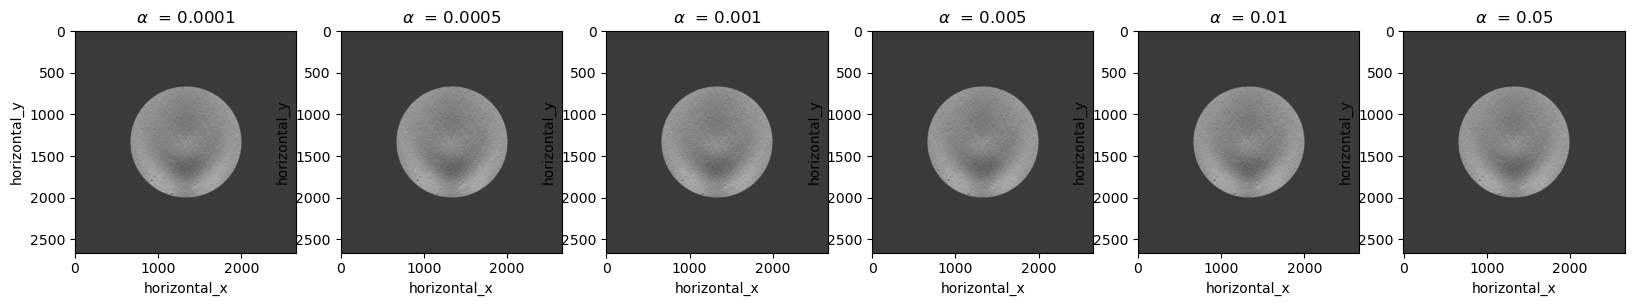

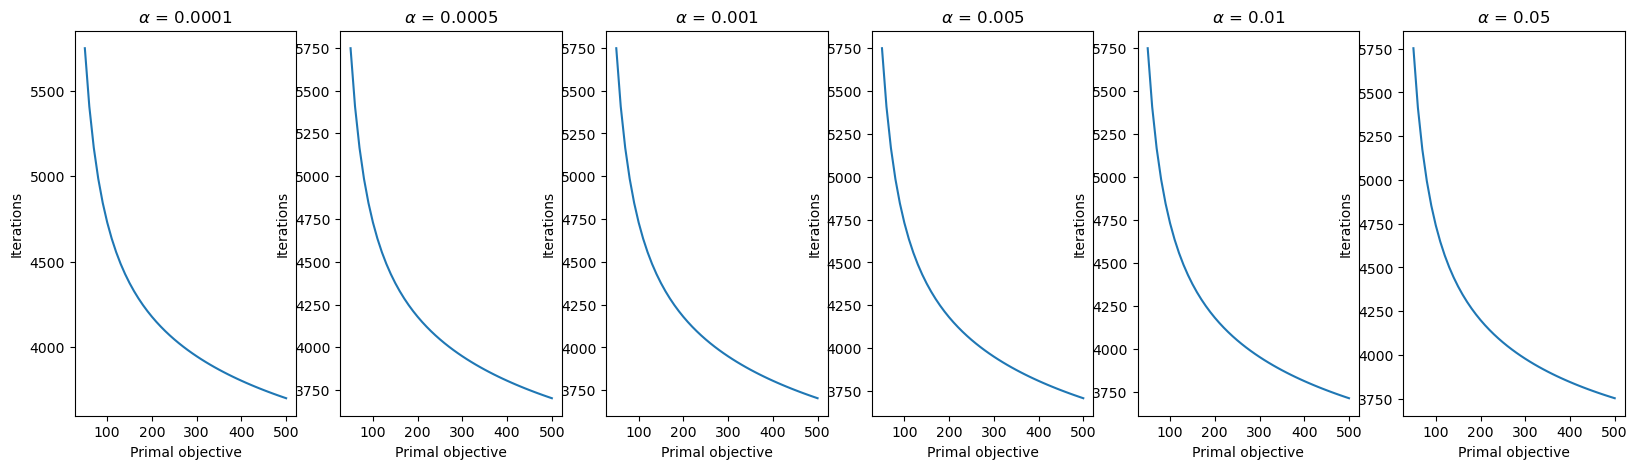

In [5]:
fig, axs = plt.subplots(1,6, figsize=(20,5))
fig2, axs2 = plt.subplots(1,6, figsize=(20,5))
fig3, axs3 = plt.subplots(1,6, figsize=(20,5))
scale_xs = [0, 0.001, 0.005, 0.01]
scale_ys = [0, 0.001, 0.005, 0.01]
i=0

alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05]
for alpha in alphas:

    file_name='reco_alpha_x_loop_'+str(i)+'.nxs'
    reader = NEXUSDataReader()
    reader.set_up(file_name=file_name)
    reco = reader.read()

    axs[i].imshow(reco.array[1000:1500,1000:1500], cmap='gray')
    axs[i].set_title(r'$\alpha$ = ' + str(alpha) )
    axs[i].set_xlabel('horizontal_x')
    axs[i].set_ylabel('horizontal_y')

    axs2[i].imshow(reco.array, cmap='gray')
    axs2[i].set_title(r'$\alpha$  = ' + str(alpha) )
    axs2[i].set_xlabel('horizontal_x')
    axs2[i].set_ylabel('horizontal_y')

    file_name = 'obj_alpha_x_loop_'+str(i)+'.npy'
    objective = np.load(file_name)
    axs3[i].plot(np.arange(5,len(objective))*10, objective[5:len(objective)])
    axs3[i].set_title(r'$\alpha$ = ' + str(alpha))
    axs3[i].set_xlabel('Primal objective')
    axs3[i].set_ylabel('Iterations')

    i=i+1


In [14]:
file_name='reco_alpha_x_loop_0.nxs'
reader = NEXUSDataReader()
reader.set_up(file_name=file_name)
reco_0 = reader.read()

file_name='reco_alpha_x_loop_1.nxs'
reader = NEXUSDataReader()
reader.set_up(file_name=file_name)
reco_1 = reader.read()

file_name='reco_alpha_x_loop_2.nxs'
reader = NEXUSDataReader()
reader.set_up(file_name=file_name)
reco_2 = reader.read()

show2D(reco_1.array[1000:1500,1000:1500])
# reco_1.array-reco_0.array

AttributeError: 'NEXUSDataReader' object has no attribute 'close'

In [15]:
angles = range(9)
angles


range(0, 9)